# **Sales Prediction ML model (LR and RF)**

# **Load data**

In [1278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/BekBrace/Sales-Forecast-data-csv/main/train.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


# **Data Preparation**

## Check for null values

In [1279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


## Use only store1's data

In [1280]:
df = df[df['store'] == 1]

## Add day, month and year columns

In [1281]:
# convert df['date'] from object to datetime datatype
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# add the day and month columns
df['day'] = df['date'].dt.weekday
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

df

<ipython-input-1281-110a09043013>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
<ipython-input-1281-110a09043013>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['date'].dt.weekday
<ipython-input-1281-110a09043013>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,date,store,item,sales,day,month,year
0,2013-01-01,1,1,13,1,1,2013
1,2013-01-02,1,1,11,2,1,2013
2,2013-01-03,1,1,14,3,1,2013
3,2013-01-04,1,1,13,4,1,2013
4,2013-01-05,1,1,10,5,1,2013
...,...,...,...,...,...,...,...
896561,2017-12-27,1,50,38,2,12,2017
896562,2017-12-28,1,50,52,3,12,2017
896563,2017-12-29,1,50,59,4,12,2017
896564,2017-12-30,1,50,66,5,12,2017


### Drop useless columns

In [1282]:
df = df.drop(['store', 'date'], axis=1)
df

,item,sales,day,month,year
0,1,13,1,1,2013
1,1,11,2,1,2013
2,1,14,3,1,2013
3,1,13,4,1,2013
4,1,10,5,1,2013
...,...,...,...,...,...
896561,50,38,2,12,2017
896562,50,52,3,12,2017
896563,50,59,4,12,2017
896564,50,66,5,12,2017


## Group data frames by item

In [1283]:
dfs = {}
for item_id, group_df in df.groupby('item'):
  dfs[item_id] = group_df.drop('item', axis=1)

dfs

{1:       sales  day  month  year
 0        13    1      1  2013
 1        11    2      1  2013
 2        14    3      1  2013
 3        13    4      1  2013
 4        10    5      1  2013
 ...     ...  ...    ...   ...
 1821     14    2     12  2017
 1822     19    3     12  2017
 1823     15    4     12  2017
 1824     27    5     12  2017
 1825     23    6     12  2017
 
 [1826 rows x 4 columns],
 2:        sales  day  month  year
 18260     33    1      1  2013
 18261     43    2      1  2013
 18262     23    3      1  2013
 18263     18    4      1  2013
 18264     34    5      1  2013
 ...      ...  ...    ...   ...
 20081     55    2     12  2017
 20082     50    3     12  2017
 20083     50    4     12  2017
 20084     56    5     12  2017
 20085     67    6     12  2017
 
 [1826 rows x 4 columns],
 3:        sales  day  month  year
 36520     15    1      1  2013
 36521     30    2      1  2013
 36522     14    3      1  2013
 36523     10    4      1  2013
 36524     23    5 

## Data Separation as X and Y

In [1284]:
y = {}
for item_id in dfs:
  y[item_id] = dfs[item_id]['sales']

y

{1: 0       13
 1       11
 2       14
 3       13
 4       10
         ..
 1821    14
 1822    19
 1823    15
 1824    27
 1825    23
 Name: sales, Length: 1826, dtype: int64,
 2: 18260    33
 18261    43
 18262    23
 18263    18
 18264    34
          ..
 20081    55
 20082    50
 20083    50
 20084    56
 20085    67
 Name: sales, Length: 1826, dtype: int64,
 3: 36520    15
 36521    30
 36522    14
 36523    10
 36524    23
          ..
 38341    26
 38342    21
 38343    38
 38344    27
 38345    29
 Name: sales, Length: 1826, dtype: int64,
 4: 54780    10
 54781    11
 54782     8
 54783    19
 54784    12
          ..
 56601    16
 56602    20
 56603    25
 56604    19
 56605    15
 Name: sales, Length: 1826, dtype: int64,
 5: 73040    11
 73041     6
 73042     8
 73043     9
 73044     8
          ..
 74861     6
 74862    15
 74863    17
 74864    22
 74865    17
 Name: sales, Length: 1826, dtype: int64,
 6: 91300    31
 91301    36
 91302    18
 91303    19
 91304    31
   

In [1285]:
X = {}
for item_id in dfs:
  X[item_id] = dfs[item_id].drop('sales', axis=1)

X

{1:       day  month  year
 0       1      1  2013
 1       2      1  2013
 2       3      1  2013
 3       4      1  2013
 4       5      1  2013
 ...   ...    ...   ...
 1821    2     12  2017
 1822    3     12  2017
 1823    4     12  2017
 1824    5     12  2017
 1825    6     12  2017
 
 [1826 rows x 3 columns],
 2:        day  month  year
 18260    1      1  2013
 18261    2      1  2013
 18262    3      1  2013
 18263    4      1  2013
 18264    5      1  2013
 ...    ...    ...   ...
 20081    2     12  2017
 20082    3     12  2017
 20083    4     12  2017
 20084    5     12  2017
 20085    6     12  2017
 
 [1826 rows x 3 columns],
 3:        day  month  year
 36520    1      1  2013
 36521    2      1  2013
 36522    3      1  2013
 36523    4      1  2013
 36524    5      1  2013
 ...    ...    ...   ...
 38341    2     12  2017
 38342    3     12  2017
 38343    4     12  2017
 38344    5     12  2017
 38345    6     12  2017
 
 [1826 rows x 3 columns],
 4:        day  mon

## Data Splitting

In [1286]:
from sklearn.model_selection import train_test_split

train_test_df_list = []
for item in X:
  # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
  train_test_df_list.append(train_test_split(X[item], y[item], test_size=0.2, random_state=100))


train_test_df_list

[[      day  month  year
  169     2      6  2013
  22      2      1  2013
  606     5      8  2014
  1415    2     11  2016
  371     1      1  2014
  ...   ...    ...   ...
  53      5      2  2013
  350     1     12  2013
  79      3      3  2013
  792     2      3  2015
  1544    5      3  2017
  
  [1460 rows x 3 columns],
        day  month  year
  414     2      2  2014
  509     6      5  2014
  571     5      7  2014
  28      1      1  2013
  1489    6      1  2017
  ...   ...    ...   ...
  1511    0      2  2017
  298     5     10  2013
  1127    1      2  2016
  1122    3      1  2016
  238     1      8  2013
  
  [366 rows x 3 columns],
  169     18
  22       9
  606     30
  1415    20
  371     11
          ..
  53      15
  350      8
  79      17
  792     19
  1544    20
  Name: sales, Length: 1460, dtype: int64,
  414     16
  509     20
  571     29
  28       6
  1489    24
          ..
  1511     5
  298     19
  1127    16
  1122    17
  238     16
  Name: sale

# **Model Building**

## **Training the model**

In [1287]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lr_models_list = []
rf_models_list = []
for items_dataset in train_test_df_list:
  lr = LinearRegression()
  lr.fit(items_dataset[0], items_dataset[2])
  lr_models_list.append(lr)
  rf = RandomForestRegressor(max_depth=5, random_state=100)
  rf.fit(items_dataset[0], items_dataset[2])
  rf_models_list.append(rf)

## **Applying the model to make a prediction**

In [1288]:
y_lr_train_pred_list = []
y_lr_test_pred_list = []
y_rf_train_pred_list = []
y_rf_test_pred_list = []

for model, df in zip(lr_models_list, train_test_df_list):
  y_lr_train_pred_list.append(model.predict(df[0]))
  y_lr_test_pred_list.append(model.predict(df[1]))

for model, df in zip(rf_models_list, train_test_df_list):
  y_rf_train_pred_list.append(model.predict(df[0]))
  y_rf_test_pred_list.append(model.predict(df[1]))

# y_lr_train_pred = lr.predict(X_train)
# y_lr_test_pred = lr.predict(X_test)

## **Evaluate model performance**

In [1289]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear regression testing performance
lr_train_mse_list = []
lr_train_r2_list = []
lr_test_mse_list = []
lr_test_r2_list = []

for pred, df in zip(y_lr_train_pred_list, train_test_df_list):
  lr_train_mse_list.append(mean_squared_error(df[2], pred))
  lr_train_r2_list.append(r2_score(df[2], pred))

for pred, df in zip(y_lr_test_pred_list, train_test_df_list):
  lr_test_mse_list.append(mean_squared_error(df[3], pred))
  lr_test_r2_list.append(r2_score(df[3], pred))

# Random Forest testing performance
rf_train_mse_list = []
rf_train_r2_list = []
rf_test_mse_list = []
rf_test_r2_list = []

for pred, df in zip(y_rf_train_pred_list, train_test_df_list):
  rf_train_mse_list.append(mean_squared_error(df[2], pred))
  rf_train_r2_list.append(r2_score(df[2], pred))

for pred, df in zip(y_rf_test_pred_list, train_test_df_list):
  rf_test_mse_list.append(mean_squared_error(df[3], pred))
  rf_test_r2_list.append(r2_score(df[3], pred))


# lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
# lr_train_r2 = r2_score(y_train, y_lr_train_pred)

# lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
# lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [1290]:
lr_results = pd.DataFrame([[item_id for item_id in dfs], lr_train_mse_list, lr_train_r2_list, lr_test_mse_list, lr_test_r2_list]).transpose()
lr_results.columns = ['Item id', 'Training MSE', 'Training R2', 'Testing MSE', 'Testing R2']
lr_results['Item id'] = lr_results['Item id'].astype(int)

rf_results = pd.DataFrame([[item_id for item_id in dfs], rf_train_mse_list, rf_train_r2_list, rf_test_mse_list, rf_test_r2_list]).transpose()
rf_results.columns = ['Item id', 'Training MSE', 'Training R2', 'Testing MSE', 'Testing R2']
rf_results['Item id'] = rf_results['Item id'].astype(int)

lr_results

,Item id,Training MSE,Training R2,Testing MSE,Testing R2
0,1,32.306979,0.265242,38.377922,0.250144
1,2,146.390400,0.360712,149.785704,0.283540
2,3,72.015680,0.311434,66.667442,0.248239
3,4,33.273252,0.248500,33.089685,0.235221
4,5,24.734702,0.241111,23.859992,0.215244
5,6,140.884938,0.366267,143.877764,0.312558
6,7,151.440364,0.350064,142.464789,0.299751
7,8,217.615618,0.389979,218.718287,0.337838
8,9,121.102011,0.327516,111.253467,0.289707
9,10,209.859385,0.384939,201.036170,0.339995


Which item do you want to visualize: 5
Linear Regression r2 score:  0.3125575791020744
Random Forest Regression r2 score:  0.6183004891838282


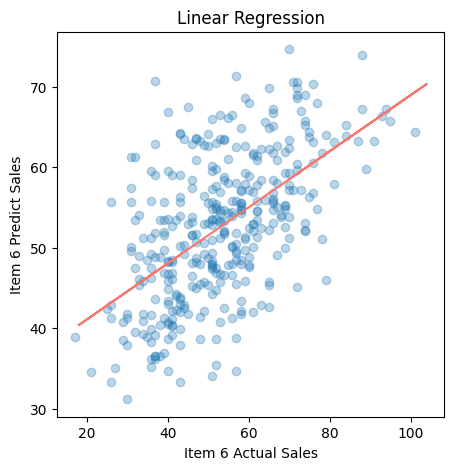

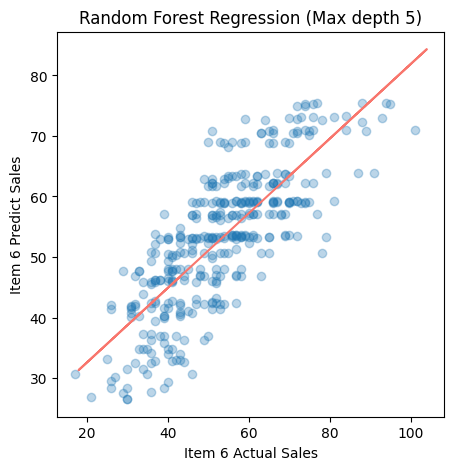

In [1291]:
item_to_vis = int(input("Which item do you want to visualize: "))

# Linear Regression
plt.figure(figsize=(5,5))
plt.scatter(x=train_test_df_list[item_to_vis][3], y=y_lr_test_pred_list[item_to_vis], alpha=0.3)
z = np.polyfit(train_test_df_list[item_to_vis][3], y_lr_test_pred_list[item_to_vis], 1)
p = np.poly1d(z)
plt.plot(train_test_df_list[item_to_vis][2], p(train_test_df_list[item_to_vis][2]), '#F8766D')
plt.title("Linear Regression")
plt.ylabel(f'Item {item_to_vis + 1} Predict Sales')
plt.xlabel(f'Item {item_to_vis + 1} Actual Sales')
print('Linear Regression r2 score: ', lr_test_r2_list[item_to_vis])

# Random Forest
plt.figure(figsize=(5,5))
plt.scatter(x=train_test_df_list[item_to_vis][3], y=y_rf_test_pred_list[item_to_vis], alpha=0.3)
z = np.polyfit(train_test_df_list[item_to_vis][3], y_rf_test_pred_list[item_to_vis], 1)
p = np.poly1d(z)
plt.plot(train_test_df_list[item_to_vis][2], p(train_test_df_list[item_to_vis][2]), '#F8766D')
plt.title("Random Forest Regression (Max depth 5)")
plt.ylabel(f'Item {item_to_vis + 1} Predict Sales')
plt.xlabel(f'Item {item_to_vis + 1} Actual Sales')
print('Random Forest Regression r2 score: ', rf_test_r2_list[item_to_vis])